In [53]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import pylab as plt

In [54]:
batch_size=20
num_class=10
epochs=2
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

60000 train samples
10000 test samples


Labels :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


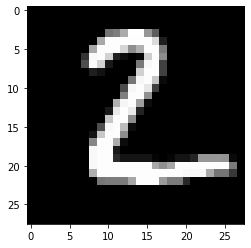

In [55]:
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_class)
y_test = keras.utils.np_utils.to_categorical(y_test, num_class)
print("Labels : ",y_test[1])
plt.imshow(x_test[1].reshape(28,28),cmap="gray")
plt.show()

In [56]:
first_layer_size=32
model=Sequential()
model.add(Dense(first_layer_size,activation="sigmoid",input_shape=(784,)))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(num_class,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [57]:
w=[]
for layer in model.layers:
  weights=layer.get_weights()
  w.append(weights)
layer1=np.array(w[0][0])
print("shape of the 1st layer",layer1.shape)

shape of the 1st layer (784, 32)


visulization of the 1st layer


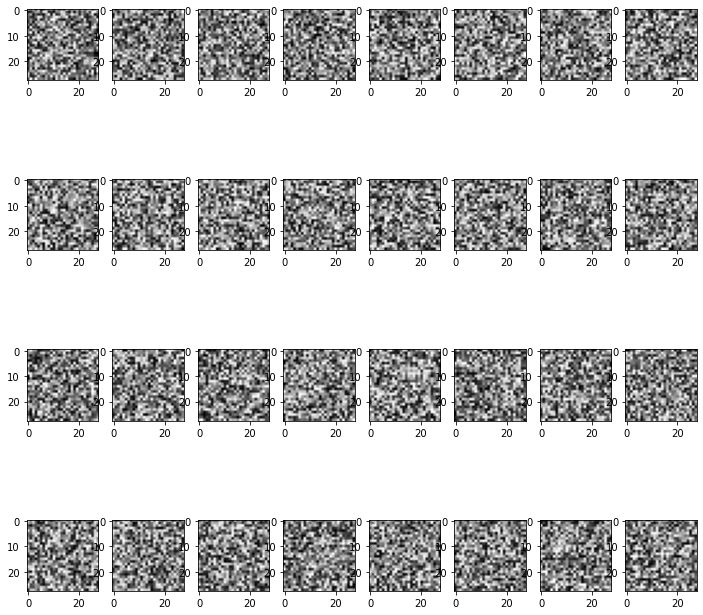

In [58]:
print("visulization of the 1st layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)
for i in range (1,columns*rows +1):
  fig.add_subplot(rows,columns,i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap="gray")
plt.show()

In [59]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

# Training

In [60]:
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/2
60000/60000 [==============================] - 9s 149us/step - loss: 1.0729 - accuracy: 0.6731
Epoch 2/2
60000/60000 [==============================] - 9s 145us/step - loss: 0.3687 - accuracy: 0.9067


In [61]:
x_test.shape

(10000, 784)

In [62]:
y_test.shape

(10000, 10)

In [63]:
score=model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 3s 254us/step


In [64]:
score

[0.3006505544424057, 0.9218000173568726]

In [65]:
print("the loss function ",score[0])
print("the accuracy ",score[1])

the loss function  0.3006505544424057
the accuracy  0.9218000173568726


shape of the 1st layer (784, 32)
visulization of the 1st layer


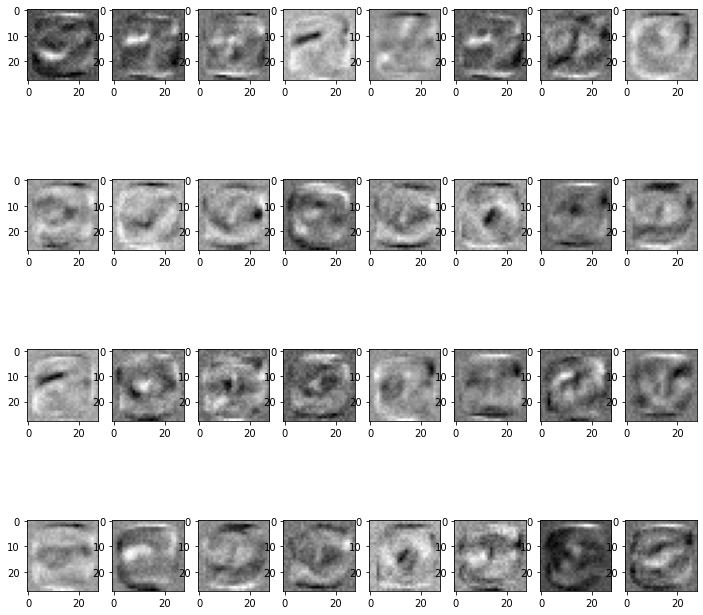

In [66]:
w=[]
for layer in model.layers:
  weights=layer.get_weights()
  w.append(weights)
layer1=np.array(w[0][0])
print("shape of the 1st layer",layer1.shape)
print("visulization of the 1st layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)
for i in range (1,columns*rows +1):
  fig.add_subplot(rows,columns,i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap="gray")
plt.show()

In [67]:
prediction=model.predict(x_test[88:89])
prediction=prediction[0]
print("prediction :",prediction)
print("the thersholded output",(prediction>0.5)*1)

prediction : [2.6106184e-06 6.7443028e-03 3.6869873e-03 7.7304412e-07 5.4242872e-03
 6.2291678e-05 9.8045510e-01 1.3820560e-05 3.5110724e-03 9.8792465e-05]
the thersholded output [0 0 0 0 0 0 1 0 0 0]


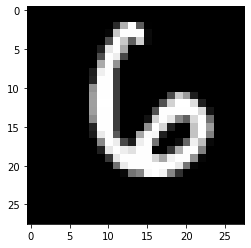

In [68]:
plt.imshow(x_test[88].reshape(28,28),cmap="gray")
plt.show()

In [69]:
sum(prediction)

1.0000000385791736

In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [71]:
path="/Users/jeya/Downloads/six.jpeg"

(<matplotlib.image.AxesImage at 0x7fe6ea182710>, (-0.5, 317.5, 158.5, -0.5))

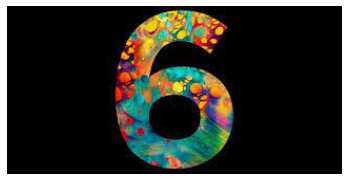

In [72]:
image_bgr=cv2.imread(path,cv2.IMREAD_COLOR)
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb),plt.axis("off")

In [73]:
image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))

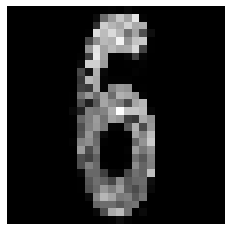

In [74]:
plt.imshow(image_resized,cmap="gray"),plt.axis("off")
plt.show()

prediction

In [75]:
prediction=model.predict(image_resized.reshape(1,784))
print("prediction score:",prediction[0])
threshold=(prediction>0.5)*1
print("threshold score",threshold[0])
print("predicted digit: ",np.where(threshold==1)[1][0])

prediction score: [4.5517285e-05 4.7262204e-03 4.5361244e-03 7.4913537e-06 2.0958878e-02
 1.9672059e-03 9.1211307e-01 1.2341928e-05 5.5208795e-02 4.2445681e-04]
threshold score [0 0 0 0 0 0 1 0 0 0]
predicted digit:  6
